# Checking the properties of objects as measured from the intensity images

also downscaling the gfp/rfp images

In [1]:
import napari
from macrohet import dataio, tile
import btrack

In [2]:
btrack.__version__

'0.5.0'

In [3]:
image_dir = '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/'
metadata_fn = '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Index.idx.xml'
metadata = dataio.read_harmony_metadata(metadata_fn)

Reading metadata XML file...


Extracting HarmonyV5 metadata:   0%|          | 0/113400 [00:00<?, ?it/s]

Extracting metadata complete!


In [4]:
metadata_path = '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Assaylayout/20210602_Live_cell_IPSDMGFP_ATB.xml'
assay_layout = dataio.read_harmony_metadata(metadata_path, assay_layout=True,)# mask_exist=True,  image_dir = image_dir, image_metadata = metadata)


Reading metadata XML file...
Extracting metadata complete!


In [5]:
row = 3
column = 5

### Now to lazily mosaic the images using Dask prior to viewing them.

1x (75,2,3) [TCZ] image stack takes approximately 1 minute to stitch together, so only load the one field of view I want.

In [16]:
images = tile.compile_mosaic(image_dir, 
                             metadata, 
                             row, column, 
                             set_plane='sum_proj',
#                              set_channel=1,
#                              set_time = 66,
#                             input_transforms = [input_transforms]
                            )#.compute().compute()

In [ ]:
%%time
images = images.compute().compute()

# Load tracks

In [8]:
with btrack.dataio.HDF5FileHandler(f"/mnt/DATA/macrohet/labels/full_localisation/downscaled/cleaned/{row,column}.h5", 'r') as hdf:
#     tracks = hdf.tracks
    segmentation = hdf.segmentation
    objects = hdf.objects
with btrack.dataio.HDF5FileHandler(f"/mnt/DATA/macrohet/labels/full_localisation/downscaled/({row},{column}).h5", 'r') as hdf:
    tracks = hdf.tracks
#     segmentation = hdf.segmentation
#     objects = hdf.objects
napari_tracks, properties, graph = btrack.utils.tracks_to_napari(tracks, ndim=2)

[INFO][2023/04/14 04:23:20 PM] Opening HDF file: /mnt/DATA/macrohet/labels/full_localisation/downscaled/cleaned/(3, 5).h5...
[INFO][2023/04/14 04:23:20 PM] Loading segmentation (75, 1200, 1200)
[INFO][2023/04/14 04:23:20 PM] Loading objects/obj_type_1 (26917, 5) (26917 filtered: None)
[INFO][2023/04/14 04:23:21 PM] Closing HDF file: /mnt/DATA/macrohet/labels/full_localisation/downscaled/cleaned/(3, 5).h5
[INFO][2023/04/14 04:23:21 PM] Opening HDF file: /mnt/DATA/macrohet/labels/full_localisation/downscaled/(3,5).h5...
[INFO][2023/04/14 04:23:21 PM] Loading tracks/obj_type_1
[INFO][2023/04/14 04:23:21 PM] Loading objects/obj_type_1 (26917, 5) (26917 filtered: None)
[INFO][2023/04/14 04:23:21 PM] Closing HDF file: /mnt/DATA/macrohet/labels/full_localisation/downscaled/(3,5).h5


# Inspect tracks

In [10]:
tracks[1]

,ID,t,x,y,z,parent,root,state,generation,dummy,major_axis_length,mean_intensity-1,orientation,minor_axis_length,area,mean_intensity-0
0,311,0,214.715118,649.776428,0.000000,311,311,5,0,False,87.540939,0.005709,-0.702612,67.977715,4602.0,0.019985
1,311,1,214.955872,648.901794,0.000000,311,311,5,0,False,93.885040,0.005699,-1.135783,59.075867,4329.0,0.023402
2,311,2,223.674240,650.713928,0.000000,311,311,5,0,False,78.966621,0.005765,-0.973927,63.196747,3877.0,0.031596
3,311,3,221.003372,652.696777,0.000000,311,311,5,0,False,82.459908,0.005688,-0.636698,68.969749,4449.0,0.020448
4,311,4,219.889526,644.160156,0.000000,311,311,5,0,False,82.786476,0.005681,-0.165750,70.720299,4571.0,0.017730
5,311,5,229.067581,637.181396,0.000000,311,311,5,0,False,84.821068,0.005696,-0.628409,71.674942,4631.0,0.019196
6,311,6,221.384613,636.014343,0.000000,311,311,5,0,False,79.533455,0.005663,-0.605209,77.587761,4745.0,0.014915
7,311,7,232.046127,633.646667,0.000000,311,311,5,0,False,83.895653,0.005669,-0.631393,75.166443,4834.0,0.015898
8,311,8,230.541687,633.444214,0.000000,311,311,5,0,False,99.743805,0.005657,-1.394356,69.983238,5385.0,0.014837
9,311,9,217.077103,637.043152,0.000000,311,311,5,0,False,95.179710,0.005652,-0.989412,72.682899,5240.0,0.012387


In [11]:
import seaborn as sns

<AxesSubplot:>

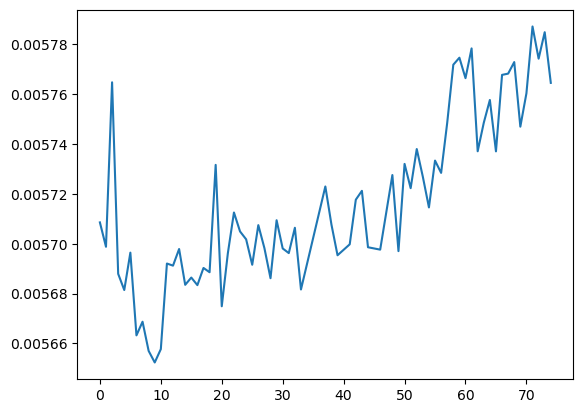

In [14]:
sns.lineplot(y = tracks[1].properties['mean_intensity-1'], x = tracks[1].t)

# Inspect image

In [20]:
img = images[0].compute().compute()

In [22]:
gfp = img[0]
rfp = img[1]

In [26]:
gfp.shape

(6048, 6048)

In [27]:
gfp.dtype

dtype('uint64')

In [31]:
import matplotlib.pyplot as plt

(array([[4455., 1126.,  273., ...,    0.,    0.,    0.],
        [4453., 1126.,  273., ...,    0.,    0.,    0.],
        [4442., 1126.,  282., ...,    0.,    0.,    0.],
        ...,
        [4075., 1629.,  340., ...,    0.,    0.,    0.],
        [4109., 1632.,  307., ...,    0.,    0.,    0.],
        [6048.,    0.,    0., ...,    0.,    0.,    0.]]),
 array([    0. ,  1318.6,  2637.2,  3955.8,  5274.4,  6593. ,  7911.6,
         9230.2, 10548.8, 11867.4, 13186. ]),
 <a list of 6048 BarContainer objects>)

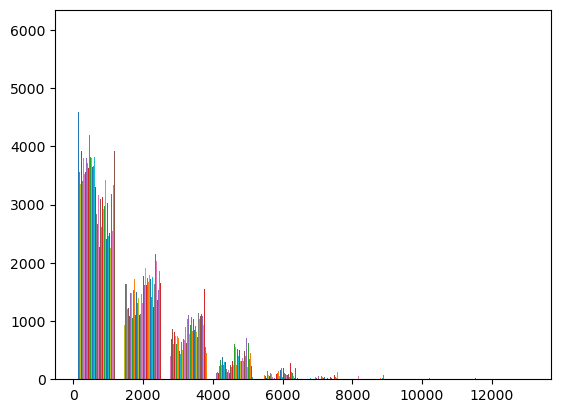

In [32]:
plt.hist(gfp)

In [33]:
plt.hist(gfp, bins = 100)


KeyboardInterrupt



Error in callback <function flush_figures at 0x7f6f649f1af0> (for post_execute):


KeyboardInterrupt: 

#### downscaling properly 

In [29]:
from skimage.transform import rescale

In [34]:
gfp_rescale = rescale(gfp, 1200/6048, anti_aliasing=False)

(array([[955., 160.,  52., ...,   0.,   0.,   0.],
        [938., 173.,  55., ...,   0.,   0.,   0.],
        [950., 154.,  58., ...,   0.,   0.,   0.],
        ...,
        [844., 291.,  62., ...,   0.,   0.,   0.],
        [865., 279.,  54., ...,   0.,   0.,   0.],
        [872., 296.,  32., ...,   0.,   0.,   0.]]),
 array([1.57632588e-17, 8.47804921e-17, 1.53797725e-16, 2.22814959e-16,
        2.91832192e-16, 3.60849425e-16, 4.29866659e-16, 4.98883892e-16,
        5.67901125e-16, 6.36918359e-16, 7.05935592e-16]),
 <a list of 1200 BarContainer objects>)

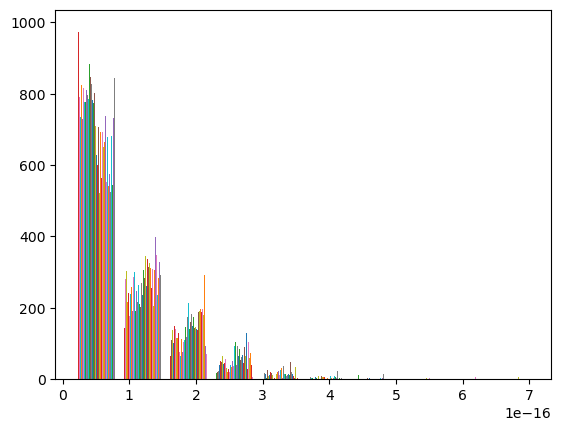

In [35]:
plt.hist(gfp_rescale)

In [37]:
gfp_rescale.dtype

dtype('float64')

In [39]:
import numpy as np

In [42]:
help(rescale)

Help on function rescale in module skimage.transform._warps:

rescale(image, scale, order=None, mode='reflect', cval=0, clip=True, preserve_range=False, multichannel=False, anti_aliasing=None, anti_aliasing_sigma=None, *, channel_axis=None)
    Scale image by a certain factor.
    
    
    Performs interpolation to up-scale or down-scale N-dimensional images.
    Note that anti-aliasing should be enabled when down-sizing images to avoid
    aliasing artifacts. For down-sampling with an integer factor also see
    `skimage.transform.downscale_local_mean`.
    
    Parameters
    ----------
    image : ndarray
        Input image.
    scale : {float, tuple of floats}
        Scale factors. Separate scale factors can be defined as
        `(rows, cols[, ...][, dim])`.
    
    Returns
    -------
    scaled : ndarray
        Scaled version of the input.
    
    Other Parameters
    ----------------
    order : int, optional
        The order of the spline interpolation, default is 0 if


In [44]:
viewer.add_image(rescale(gfp, 1200/6048, preserve_range=True, anti_aliasing=False))

<Image layer 'Image [2]' at 0x7f6c88021fd0>

In [45]:
gfp_rescale = rescale(gfp, 1200/6048, preserve_range=True, anti_aliasing=False)

(array([[955., 160.,  52., ...,   0.,   0.,   0.],
        [938., 173.,  55., ...,   0.,   0.,   0.],
        [950., 154.,  58., ...,   0.,   0.,   0.],
        ...,
        [844., 291.,  62., ...,   0.,   0.,   0.],
        [865., 279.,  54., ...,   0.,   0.,   0.],
        [872., 296.,  32., ...,   0.,   0.,   0.]]),
 array([  290.7808 ,  1563.92404,  2837.06728,  4110.21052,  5383.35376,
         6656.497  ,  7929.64024,  9202.78348, 10475.92672, 11749.06996,
        13022.2132 ]),
 <a list of 1200 BarContainer objects>)

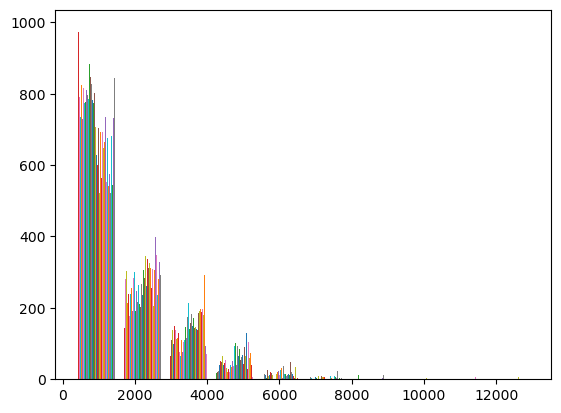

In [46]:
plt.hist(gfp_rescale)

In [41]:
viewer.add_image((gfp_rescale/np.max(gfp_rescale)*255).astype(np.uint8))

<Image layer 'Image [1]' at 0x7f6c88021df0>

# Launch napari image viewer

In [25]:
viewer = napari.Viewer()

viewer.add_image(gfp, colormap='green', contrast_limits=[100, 6000])
viewer.add_image(rfp, colormap='magenta', contrast_limits=[100, 2000])

viewer.add_image(images, 
                 channel_axis=1,
                 name=["macrophage", "mtb"],
                 colormap=["green",  "magenta"],
                 contrast_limits=[[100, 6000], [100, 2000]], visible = False
                 )
viewer.add_labels(segmentation, 
                  #scale=(10, 1, 1,), 
#                   color={1:'yellow'}
                 )
viewer.add_tracks(napari_tracks,
#                     properties=properties, 
#                     graph=graph, 
#                     name="Tracks [5,4]", 
                    blending="translucent",
                    visible=True,
#                     scale = (100,1,1)
                )

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Tracks layer 'napari_tracks' at 0x7f6f368ef310>